### Chapter 2
## Loading Data

### 2.0 Introduction
The first step in any machine learning endeavor is to get the raw data into our system. The raw data might be a logfile, dataset file, or database. Furthermore, often we will want to retrieve data from multiple sources. The recipies in this chapter look at methods of loading data from a variety of sources, including CSV files and SQL databases. We also cover methods of generating simulated data with desirable properties for experimentation. Finally, while there are many ways to load data in the Python ecosystem, we will focus on using the pandas library's extensive set of methods for loading external data, and using scikit-learn--an open source machine learning library in Python--for generating simulated data.

### 2.1 Loading a Sample Dataset
#### Problem
You want to load a prexisting sample dataset

#### Solution
scikit-learn comes with a number of popular datasets for you to use:

In [17]:
# load scikit-learn's datasets
from sklearn import datasets

# load digits dataset
digits = datasets.load_digits()

# create features matrix
features = digits.data

# create target vector
target = digits.target

# view first observation
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
features[0].shape

(64,)

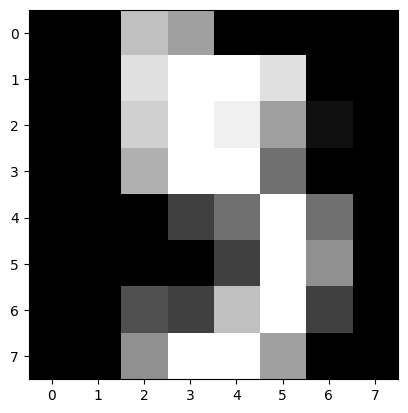

In [19]:
import matplotlib.pyplot as plt

plt.imshow(features[5].reshape(8,8),'gray')

In [20]:
target[0]

0

In [21]:
target.shape

(1797,)

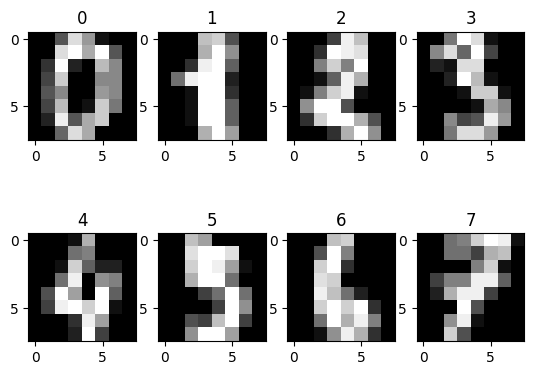

In [22]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(features[i].reshape((8,8)), cmap = 'gray')
  plt.title(f'{target[i]}')

#### Discussion
Often we do not want to go through the work of loading, transforming and cleaning a real-world dataset before we can explore some machine learning algorithm or method. Luckily, scikit-learn comes with some common datasets we can quickly load. These datasets are often called "toy" datasets because they are far smaller and cleaner than a dataset we would see in the real world. Some popular sample datasets in scikit-learn are:

`load_boston`
* Contains 503 observations on Boston housing prices. It is a good dataset for exploring regression algorithms.
    
`load_iris`
* Contains 150 observations on the measurements of Iris flowers. It is a good dataset for exploring classification algorithms

`load_digits`
* Cotnains 1,797 observations from images of handwritten digits. It is a good dataset for teaching image classification

#### See Also
* scikit-learn toy datasets (http://scikit-learn.org/stable/datasets/index.html#toy-datasets)
* The Digit Dataset (http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

### 2.2 Creating a Simulated Dataset
#### Problem
You need to generate a dataset of simulated data

#### Solution
scikit-learn offers any methods for creating simulated data. Of those, three methods are particularly useful

When we want a dataset designed to be used with linear regression, `make_regression` is a good choice:

In [23]:
iris = datasets.load_iris

In [25]:
# load library
from sklearn.datasets import make_regression

# generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1)

# view feature matrix and target vector
print("Feature Matrix \n {}".format(features[:3]))
print("Target Vector \n {}".format(target[:3]))

Feature Matrix 
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector 
 [-10.37865986  25.5124503   19.67705609]


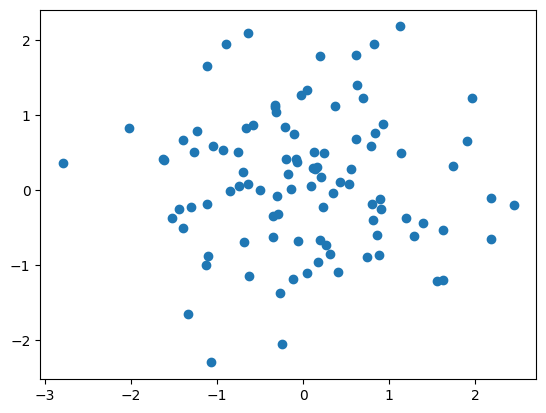

In [26]:
plt.scatter(features[:,0],features[:,1])

If we are interested in creating a simulated dataset for classification, we can use `make_classification`:

In [27]:
# load library
from sklearn.datasets import make_classification

# generate features matrix and target vector

features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

# view feature matrix and target vector
print("Feature matrix\n {}".format(features[:3]))
print("Target vector\n {}".format(target[:3]))

Feature matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target vector
 [1 0 0]


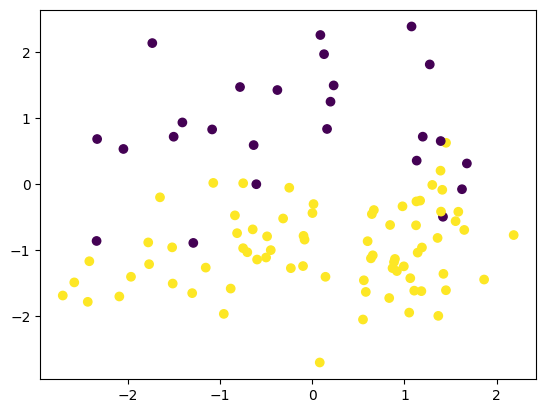

In [28]:
plt.scatter(features[:, 0], features[:, 1], c=target)

Finally, if we want a dataset designed to work well with clustering techniques, scikit-learn offers make_blobs:

In [29]:
# load library
from sklearn.datasets import make_blobs

# generate feature_matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 1,
                              shuffle = True,
                              random_state = 1)

# view feature matrix and target vector
print("Feature Matrix\n {}".format(features[:3]))
print("Target Vector\n {}".format(target[:3]))

Feature Matrix
 [[ -0.79415228   2.10495117]
 [ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]]
Target Vector
 [0 1 1]


#### Discussion
As might be apparent from the solutions, make regression returns a feature matrix of flaot values and a target vector of float values, while make_classification and make_blobs return a feature matrix of float values and a target vector of integers representing membership in a class.

scikit-learn's simulated datasets offer extensive options to control the type of data generated.

In `make_regression` and `make_classification`, `n_informative` determines the number of features that are used to generate the target vector. If n`_informative` is less than the totla number of features (`n_features`), the resulting dataset will have redundant features that cna be identified through feature selection techniques

In addition, `make_classification` contains a `weights` parameter that allows us to simulate datasets with imbalanced classes. For example, `weights = [.25, .75]` would return a dataset with 25% of observations belonging to one class and 75% to the other

For `make_blobs`, the centers parameter determines the number of clusters generated. Using the `matplotlib` visualization library we can visualize the clusters generated by `make_blobs`:

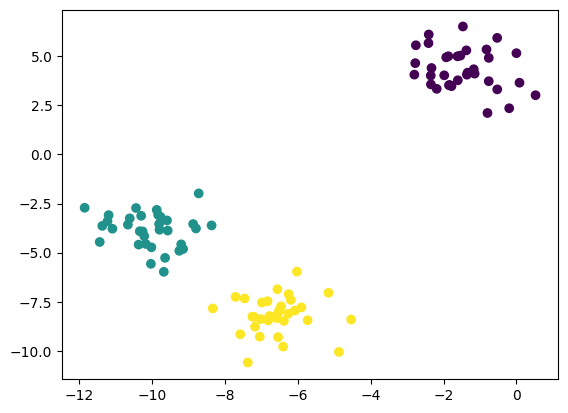

In [31]:
# load library
import matplotlib.pyplot as plt

# view scatterplot
plt.scatter(features[:, 0], features[:, 1], c=target)
plt.show()

#### See Also
* `make_regression` documentation (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
* `make_classification` documentation (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
* `make_blobs` documetnation (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

### 2.3 Loading a CSV File
#### Problem
You need to import a comma-separated values (CSV) file.

#### Solution
Use the `pandas` library's `read_csv` to load a local or hosted CSV file:

In [33]:
# load library
import pandas as pd

# create url
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv'

# load data
df = pd.read_csv(url)

df.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


### 2.4 Loading an Excel File
#### Problem
You need to import an Excel spreadsheet

#### Solution
Use the `pandas` library's `read_excel` to load an Excel spreadsheet:

In [34]:
# load library
import pandas as pd

# create url
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'

# load data
df = pd.read_excel(url, sheet_name=0, header=None)

# view the first two rows
df.head(2)

,0,1,2
0,integer,datetime,category
1,5,2015-01-01 00:00:00,0


### 2.5 Loading a JSON File
#### Problem
You need to load a JSON file for data preprocessing

#### Solution
The pandas library provides `read_json` to convert a JSON file a pandas object:

In [ ]:
# load library
import pandas as pd

# create url
url = "https://api.github.com/users/f00-/repos"

# load data
df = pd.read_json(url, orient="columns")

# view first two rows
df.head(2)

,archive_url,archived,assignees_url,blobs_url,branches_url,clone_url,collaborators_url,comments_url,commits_url,compare_url,...,subscribers_url,subscription_url,svn_url,tags_url,teams_url,trees_url,updated_at,url,watchers,watchers_count
0,https://api.github.com/repos/f00-/anscombes-qu...,False,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://github.com/f00-/anscombes-quartet.git,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,...,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://github.com/f00-/anscombes-quartet,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,https://api.github.com/repos/f00-/anscombes-qu...,2018-08-08 04:37:53,https://api.github.com/repos/f00-/anscombes-qu...,0,0
1,https://api.github.com/repos/f00-/autograd-tut...,False,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://github.com/f00-/autograd-tutorial.git,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,...,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://github.com/f00-/autograd-tutorial,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,https://api.github.com/repos/f00-/autograd-tut...,2018-06-06 03:17:19,https://api.github.com/repos/f00-/autograd-tut...,0,0


### 2.6 Querying a SQL Database
#### Problem
You need to load data from a databaseu sing structured query language (SQL)

#### Solution
`pandas`' `read_sql_query` allows us to make a SQL query to a database and load it:

In [ ]:
# load libraries
import pandas as pd
from sqlalchemy import create_engine

# create a connection to the database
db_connection = create_engine('sqlite:///sample.db')

# see table names
print(db_connection.table_names())

# load data
df = pd.read_sql_query('SELECT * FROM albums', db_connection)

df.head()

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
